# 

In [23]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import pylab
import numpy as np
from numpy import ma
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import cmocean

import xarray as xr

mpl.rcParams['text.usetex'] = True
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 18.5
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)

<Figure size 3840x2880 with 0 Axes>

<Figure size 3840x2880 with 0 Axes>

## Wind Contours

In [2]:
era5_data = xr.open_dataset(r'./out.nc')

In [3]:
era5_data

<xarray.Dataset> Size: 2MB
Dimensions:     (valid_time: 98, longitude: 51, latitude: 26)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 784B 2019-10-29T23:00:00 ... 2019...
  * longitude   (longitude) float64 408B -80.5 -80.4 -80.3 ... -75.7 -75.6 -75.5
  * latitude    (latitude) float64 208B 45.0 44.9 44.8 44.7 ... 42.7 42.6 42.5
Data variables:
    u10         (valid_time, latitude, longitude) float32 520kB ...
    v10         (valid_time, latitude, longitude) float32 520kB ...
    sp          (valid_time, latitude, longitude) float32 520kB ...
Attributes:
    CDI:                     Climate Data Interface version 2.0.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 Sun Jan 05 16:20:48 2025: cdo mergetime Oct-29.n...
    CDO:                     Climate Data Operators version 2.0.4 (https://mp...

In [4]:
era5_data.longitude.values

array([-80.5, -80.4, -80.3, -80.2, -80.1, -80. , -79.9, -79.8, -79.7,
       -79.6, -79.5, -79.4, -79.3, -79.2, -79.1, -79. , -78.9, -78.8,
       -78.7, -78.6, -78.5, -78.4, -78.3, -78.2, -78.1, -78. , -77.9,
       -77.8, -77.7, -77.6, -77.5, -77.4, -77.3, -77.2, -77.1, -77. ,
       -76.9, -76.8, -76.7, -76.6, -76.5, -76.4, -76.3, -76.2, -76.1,
       -76. , -75.9, -75.8, -75.7, -75.6, -75.5])

In [5]:
lat = era5_data.latitude.values
lon = era5_data.longitude.values
lon2D, lat2D = np.meshgrid(lon,lat)

In [6]:
vmag = ((era5_data.u10.values)**2.0+(era5_data.v10.values)**2.0)**0.5

In [44]:
def plot_contours_vmag(time_step,save_name):
    import shapefile as shp  # Requires the pyshp package
    plt.tight_layout()
    aspectRatio = 10/8
    cmap = cmocean.cm.dense
    fig, ax = plt.subplots(figsize = (15, 9))
    # tcf = ax.contourf(lon2D, lat2D, vmag[time_step], levels = np.arange(0, 11, 1), cmap="RdBu_r",extend='both')
    tcf = ax.contourf(lon2D,lat2D,vmag[time_step],levels = np.arange(0, 11, 1),cmap=cmap,extend='both')
    ax.quiver(lon2D, lat2D, era5_data.u10.values[time_step], era5_data.v10.values[time_step],units='width',pivot='tip',width=0.001,scale=250,
              headwidth=5., headlength=3.2)
    # divider = make_axes_locatable(ax)
    # cax = divider.new_vertical(size='22.5%', pad=1.0)
    # fig.colorbar(tcf, cax=cax, ax=ax, orientation='horizontal')
    cb = fig.colorbar(tcf, extend='both',orientation='horizontal', location='top')
    cb.set_label(r'$\sqrt{u_{10}^2+v_{10}^2}$\,{\rm (m/s)}')
    
    # overlay shapefile on top
    sf = shp.Reader("GSHHS_l_L1.shp")
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x,y, "g.",  markersize=6.5)

    fig.savefig(save_name, dpi=400)

In [8]:
len(era5_data.u10.values)

98

<Figure size 640x480 with 0 Axes>

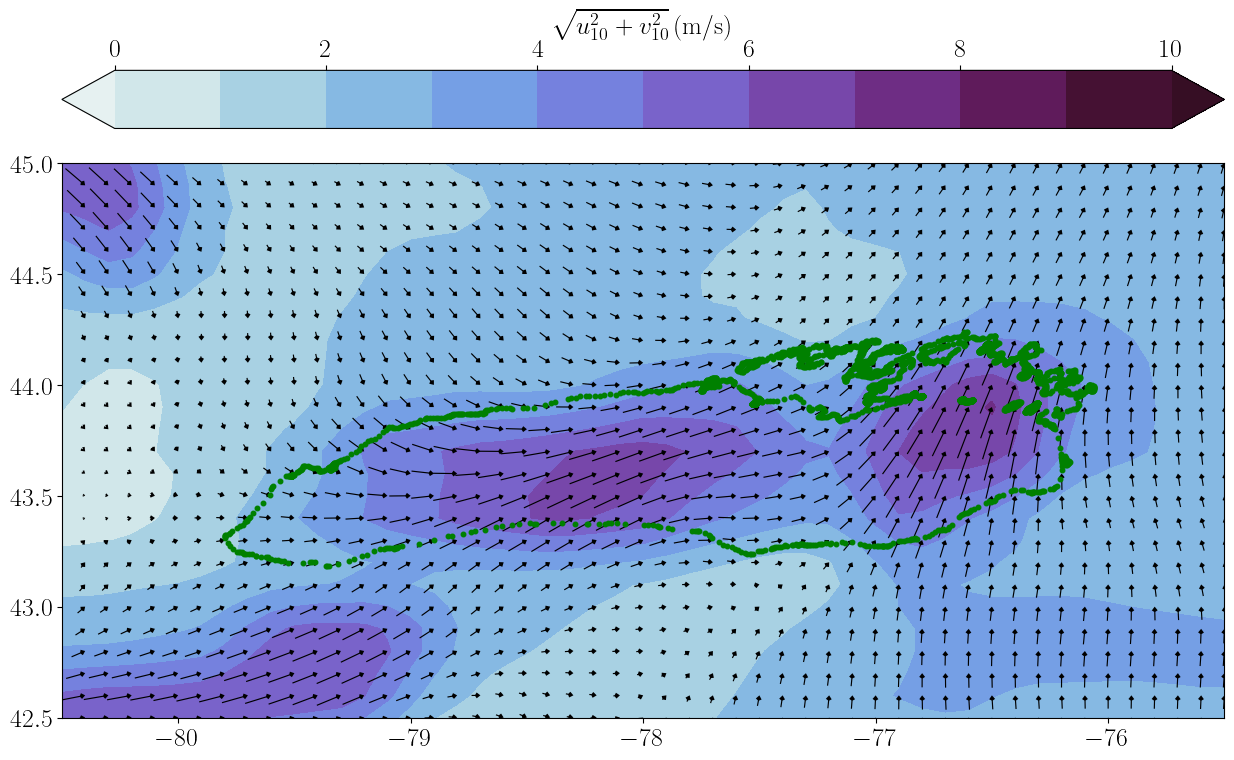

In [45]:
plot_contours_vmag(1, r'n=2')

<Figure size 640x480 with 0 Axes>

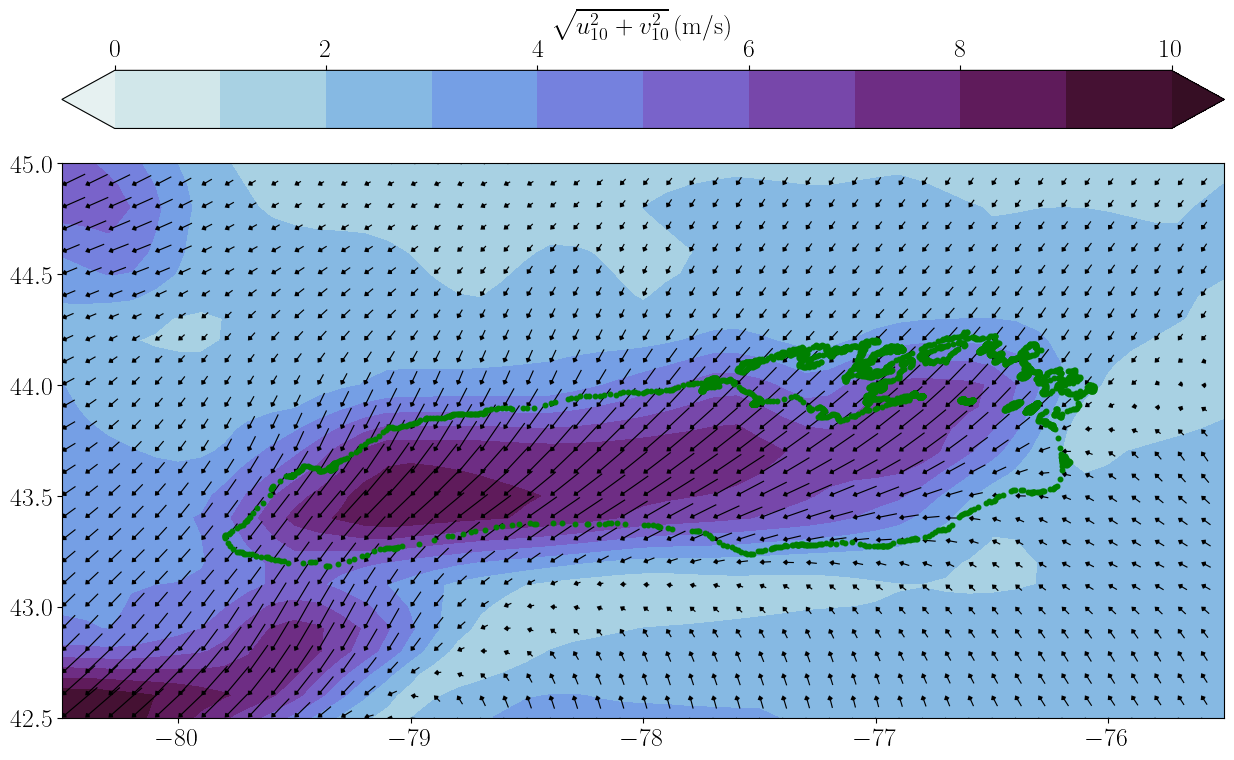

In [46]:
plot_contours_vmag(25, r'n=26')

<Figure size 640x480 with 0 Axes>

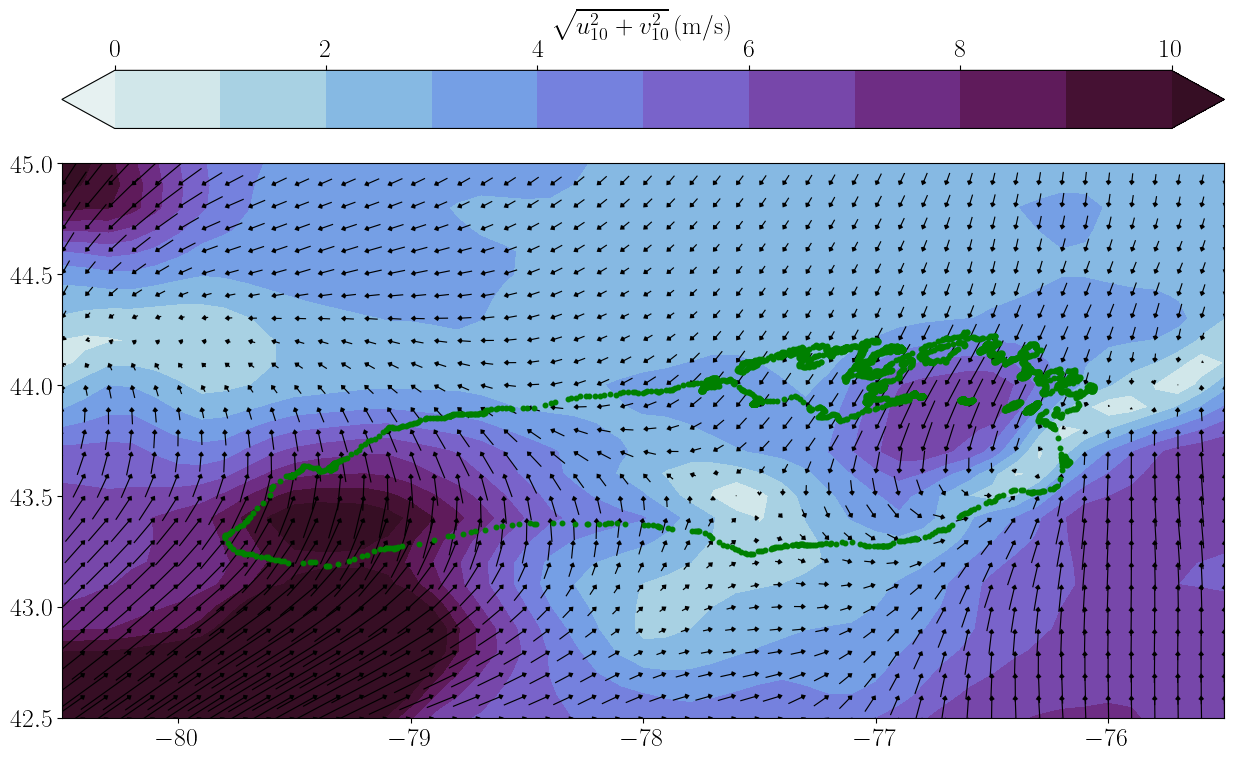

In [49]:
plot_contours_vmag(49, r'n=50')

<Figure size 640x480 with 0 Axes>

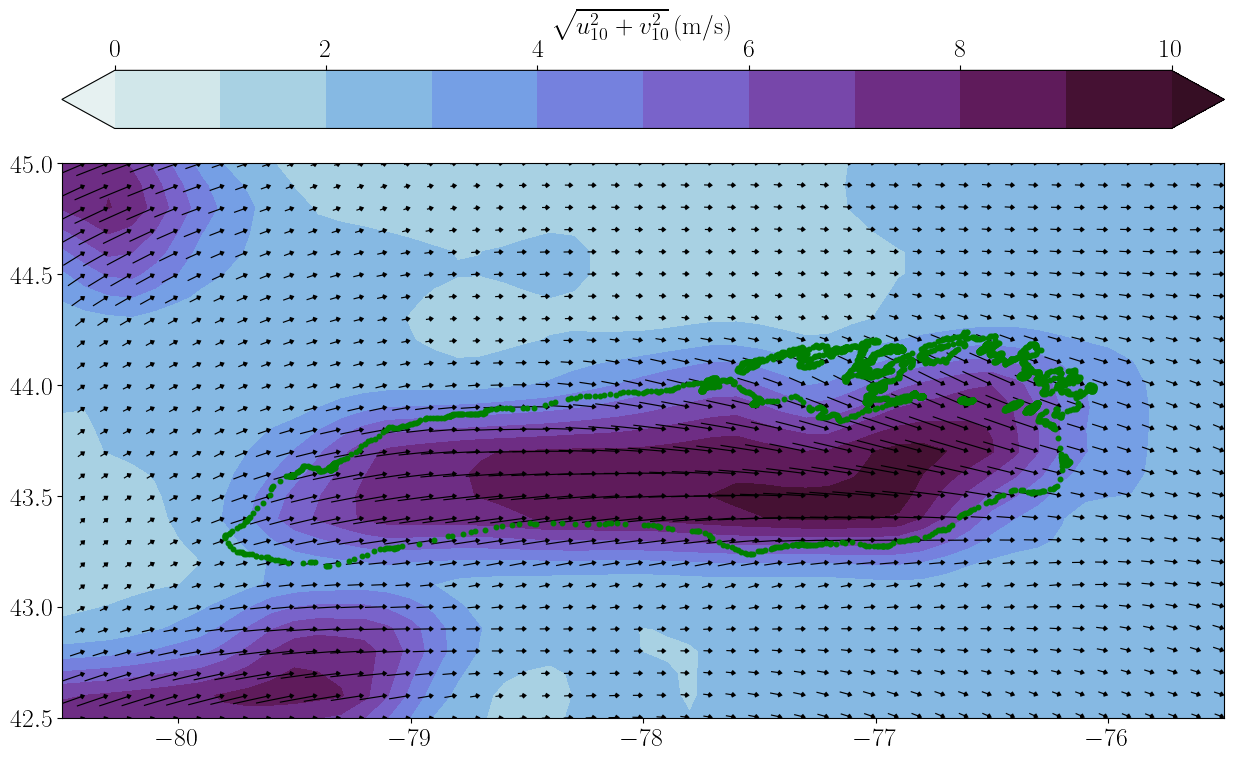

In [50]:
plot_contours_vmag(73, r'n=74')

## Statistic of the wind

In [32]:
np.mean(vmag[0])
vmag[0]

array([[6.133936 , 5.9107766, 5.6337337, ..., 2.3697913, 2.3290987,
        2.2967296],
       [5.6656337, 5.6794887, 5.677564 , ..., 2.2407634, 2.2444813,
        2.2556694],
       [5.106066 , 5.3041463, 5.518635 , ..., 2.165052 , 2.196487 ,
        2.2416577],
       ...,
       [5.0324183, 5.0971103, 5.134988 , ..., 2.9790196, 2.9835155,
        2.9766467],
       [6.300373 , 6.3918667, 6.438135 , ..., 2.8449   , 2.8667529,
        2.8525734],
       [6.513813 , 6.5740476, 6.5694733, ..., 2.6887007, 2.694905 ,
        2.6817138]], dtype=float32)

<Figure size 640x480 with 0 Axes>

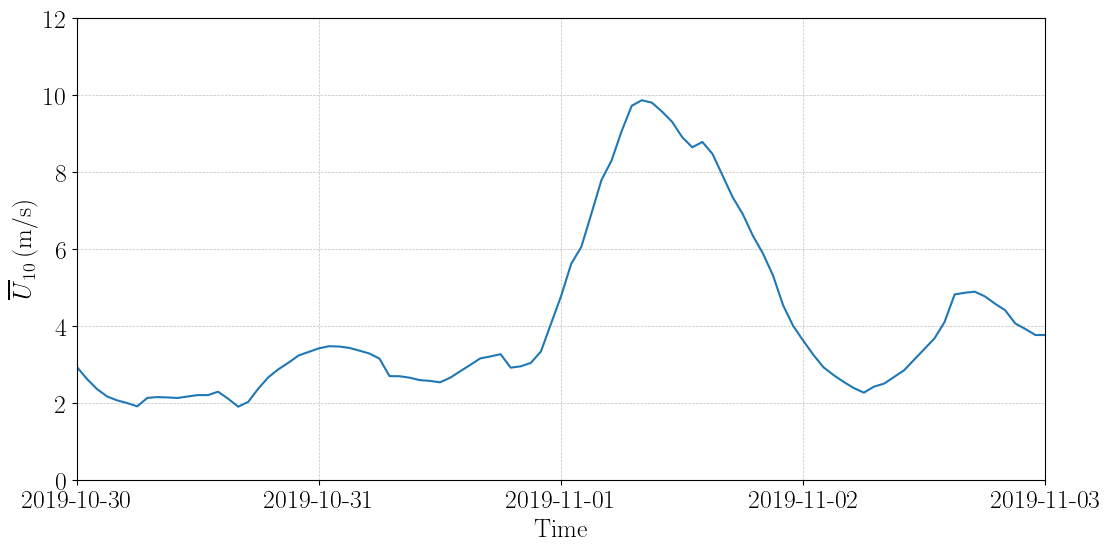

In [56]:
import pandas as pd
mean_wind = np.zeros(len(era5_data.valid_time.values))
for i in range(len(era5_data.valid_time.values)):
    mean_wind[i] = np.mean(vmag[i])

plt.tight_layout()
fig, ax = plt.subplots(figsize = (12.5, 6))
ax.plot(era5_data.valid_time.values, mean_wind, linewidth = 1.5)

plt.grid(linestyle = 'dashed', linewidth = 0.5, color='#C0C0C0')

ax.set_xlim([pd.Timestamp(2019, 10, 30, 0), pd.Timestamp(2019, 11, 3, 0)])
ax.set_ylim([0, 12])

plt.xticks(pd.date_range('2019-10-30 00', '2019-11-3 00', freq='1d'))

ax.set_xlabel(r'Time')
ax.set_ylabel(r'$\overline{U}_{10}$\,{\rm (m/s)}')

fig.savefig("wind-stat", dpi=400)